In [ ]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('train.pkl', 'rb') as f:
    train = pickle.load(f)
with open('test.pkl', 'rb') as f:
    test = pickle.load(f)

In [3]:
train

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,crop_type,field_info,harvest_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std,px_num,tile_number,valid_px_proportion
0,0.854710,0.722707,0.000000,0.0,Corn,50787_2020,174.499496,0.0,0.0,0.047707,8.218419,1.205427,0.020446,0.007112,0.000889,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.225866,0.035450,0.0,0.0,0.000000e+00,1.758405e-05,0.000115,4.279285e-06,0.0,0.0,0.0,32053.666016,2460.160156,32060.0,1.0,0.030575
1,0.841044,0.346638,0.000883,0.0,Corn,50787_2020,211.255692,0.0,0.0,0.138608,8.395391,0.946437,0.019489,0.000075,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.210477,0.037663,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32900.351562,440.999817,252497.0,2.0,0.240800
2,0.117885,0.526473,0.243028,0.0,Corn,50787_2020,189.610092,0.0,0.0,0.014408,7.201348,2.070134,0.206995,0.006712,0.000403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.240254,0.047664,0.0,0.0,3.234229e-09,1.229007e-08,0.000137,0.000000e+00,0.0,0.0,0.0,32951.636719,320.363617,212309.0,3.0,0.202474
4,0.091827,0.699622,0.306191,0.0,Corn,50787_2020,174.854385,0.0,0.0,0.866611,7.031835,1.412911,0.121772,0.037984,0.026653,0.000958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001277,0.218355,0.059991,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,2.099477e-07,0.0,0.0,0.0,32930.121094,504.934814,59525.0,5.0,0.056767
5,0.078351,0.672237,0.000000,0.0,Corn,50787_2020,231.198898,0.0,0.0,0.504748,6.981388,1.877668,0.135963,0.000175,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000058,0.222510,0.054354,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32905.542969,297.537506,163011.0,6.0,0.155459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.000000,0.080196,0.024455,0.0,Corn,72_2020,236.343155,0.0,0.0,0.000000,0.615020,5.138170,3.058913,0.593980,0.087790,0.006127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.357936,0.073985,0.0,0.0,3.135487e-09,7.721137e-08,0.000018,1.195773e-04,0.0,0.0,0.0,37169.433594,762.507446,350392.0,8.0,0.334160
8,0.000000,0.080293,0.024159,0.0,Corn,72_2020,232.948776,0.0,0.0,0.000304,1.364813,6.101490,1.839556,0.166638,0.026453,0.000747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.324955,0.060988,0.0,0.0,4.158571e-08,4.297190e-07,0.000014,1.225625e-04,0.0,0.0,0.0,37178.828125,994.355103,1030338.0,9.0,0.982607
9,0.001870,0.111908,0.027459,0.0,Corn,72_2020,233.594147,0.0,0.0,0.002601,1.417204,6.645646,1.397796,0.035560,0.001173,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.315096,0.050622,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.297594e-04,0.0,0.0,0.0,37316.613281,528.748291,1044561.0,10.0,0.996171
10,0.320803,0.030918,0.000000,0.0,Corn,72_2020,231.707611,0.0,0.0,0.000000,2.256577,6.453205,0.785856,0.004307,0.000055,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.299112,0.045448,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.291121e-04,0.0,0.0,0.0,37327.144531,543.739136,1043293.0,11.0,0.994962


In [4]:
X_train = train.drop(labels=['harvest_mean', 'crop_type', 'field_info', 'px_num', 'tile_number', 'valid_px_proportion'], axis=1)

In [5]:
X_train

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
0,0.854710,0.722707,0.000000,0.0,0.0,0.0,0.047707,8.218419,1.205427,0.020446,0.007112,0.000889,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.225866,0.035450,0.0,0.0,0.000000e+00,1.758405e-05,0.000115,4.279285e-06,0.0,0.0,0.0,32053.666016,2460.160156
1,0.841044,0.346638,0.000883,0.0,0.0,0.0,0.138608,8.395391,0.946437,0.019489,0.000075,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.210477,0.037663,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32900.351562,440.999817
2,0.117885,0.526473,0.243028,0.0,0.0,0.0,0.014408,7.201348,2.070134,0.206995,0.006712,0.000403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.240254,0.047664,0.0,0.0,3.234229e-09,1.229007e-08,0.000137,0.000000e+00,0.0,0.0,0.0,32951.636719,320.363617
4,0.091827,0.699622,0.306191,0.0,0.0,0.0,0.866611,7.031835,1.412911,0.121772,0.037984,0.026653,0.000958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001277,0.218355,0.059991,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,2.099477e-07,0.0,0.0,0.0,32930.121094,504.934814
5,0.078351,0.672237,0.000000,0.0,0.0,0.0,0.504748,6.981388,1.877668,0.135963,0.000175,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000058,0.222510,0.054354,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000e+00,0.0,0.0,0.0,32905.542969,297.537506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.000000,0.080196,0.024455,0.0,0.0,0.0,0.000000,0.615020,5.138170,3.058913,0.593980,0.087790,0.006127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.357936,0.073985,0.0,0.0,3.135487e-09,7.721137e-08,0.000018,1.195773e-04,0.0,0.0,0.0,37169.433594,762.507446
8,0.000000,0.080293,0.024159,0.0,0.0,0.0,0.000304,1.364813,6.101490,1.839556,0.166638,0.026453,0.000747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.324955,0.060988,0.0,0.0,4.158571e-08,4.297190e-07,0.000014,1.225625e-04,0.0,0.0,0.0,37178.828125,994.355103
9,0.001870,0.111908,0.027459,0.0,0.0,0.0,0.002601,1.417204,6.645646,1.397796,0.035560,0.001173,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.315096,0.050622,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.297594e-04,0.0,0.0,0.0,37316.613281,528.748291
10,0.320803,0.030918,0.000000,0.0,0.0,0.0,0.000000,2.256577,6.453205,0.785856,0.004307,0.000055,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.299112,0.045448,0.0,0.0,0.000000e+00,0.000000e+00,0.000008,1.291121e-04,0.0,0.0,0.0,37327.144531,543.739136


In [6]:
test

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,crop_type,field_info,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std,px_num,tile_number,valid_px_proportion
12,0.386093,0.480049,0.139860,0.0,Corn,72_2020,0.0,0.0,0.000218,4.094136,4.336040,1.027408,0.041736,0.000435,0.000027,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285632,0.060784,0.0,0.0,1.650804e-08,1.226312e-07,0.000014,1.231634e-04,0.0,0.0,0.0,37159.269531,771.734314,349400.0,13.0,0.333214
14,0.000000,0.030705,0.000000,0.0,Corn,72_2020,0.0,0.0,0.000029,1.772755,6.051907,1.449822,0.149401,0.062607,0.013480,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317621,0.065575,0.0,0.0,0.000000e+00,0.000000e+00,0.000007,1.307610e-04,0.0,0.0,0.0,37331.328125,557.529236,329127.0,15.0,0.313880
15,0.000000,0.081617,0.003744,0.0,Corn,72_2020,0.0,0.0,0.000019,2.831839,5.745485,0.908785,0.013641,0.000232,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296440,0.050604,0.0,0.0,6.479168e-08,2.519379e-07,0.000013,1.238269e-04,0.0,0.0,0.0,37258.417969,1053.952393,1025877.0,16.0,0.978353
16,0.004276,0.074157,0.006847,0.0,Corn,72_2020,0.0,0.0,0.000055,2.703443,6.040906,0.752670,0.002926,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295317,0.047511,0.0,0.0,0.000000e+00,0.000000e+00,0.000005,1.320971e-04,0.0,0.0,0.0,37469.238281,538.353333,1045521.0,17.0,0.997087
17,0.333352,0.021147,0.000000,0.0,Corn,72_2020,0.0,0.0,0.000000,1.854301,6.417746,1.214192,0.013634,0.000127,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307088,0.049356,0.0,0.0,0.000000e+00,0.000000e+00,0.000004,1.333414e-04,0.0,0.0,0.0,37486.871094,526.481750,1045860.0,18.0,0.997410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.050837,0.254421,0.000000,0.0,Corn,50774_2020,0.0,0.0,0.312279,6.247535,1.926179,0.907644,0.091525,0.008744,0.005572,0.000522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247662,0.080175,0.0,0.0,0.000000e+00,2.517783e-06,0.000131,3.752764e-06,0.0,0.0,0.0,33436.882812,1333.324341,491064.0,85.0,0.468315
85,0.000000,0.075443,0.000000,0.0,Corn,50774_2020,0.0,0.0,0.010977,6.157296,2.209677,1.034857,0.083445,0.002700,0.000835,0.000213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262212,0.073097,0.0,0.0,1.566257e-08,2.131136e-08,0.000137,5.083916e-08,0.0,0.0,0.0,33500.664062,300.470154,534855.0,86.0,0.510077
86,0.020725,0.234638,0.000000,0.0,Corn,50774_2020,0.0,0.0,0.296746,5.891145,2.395780,0.857880,0.055426,0.002252,0.000669,0.000101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252853,0.074429,0.0,0.0,2.463513e-08,7.320154e-07,0.000135,1.233516e-06,0.0,0.0,0.0,33506.078125,796.813721,468267.0,87.0,0.446574
87,0.882371,0.343513,0.018653,0.0,Corn,50774_2020,0.0,0.0,2.893169,5.241519,1.246274,0.117089,0.001933,0.000016,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195359,0.058829,0.0,0.0,1.475034e-07,2.904260e-07,0.000136,4.603756e-07,0.0,0.0,0.0,33489.847656,729.197510,599588.0,88.0,0.571812


In [7]:
y_train = train['harvest_mean']

In [8]:
X_test = test.drop(labels=['crop_type', 'field_info', 'px_num', 'tile_number', 'valid_px_proportion'], axis=1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [24]:
X_train

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
40,1.046703,0.058808,0.425447,0.097597,0.0,0.0,0.010841,4.526843,3.630976,1.152429,0.176731,0.002170,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000010,0.286402,0.069505,0.0,0.0,0.000000e+00,0.000000e+00,0.000003,0.000134,0.0,0.0,0.0,37610.949219,535.319641
15,0.568963,0.004069,0.211682,0.000000,0.0,0.0,0.008011,6.404354,3.085425,0.002201,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000000,0.250190,0.029312,0.0,0.0,0.000000e+00,0.000000e+00,0.000134,0.000003,0.0,0.0,0.0,35926.718750,215.971024
107,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.631701,7.570619,1.282990,0.014691,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.313638,0.044369,0.0,0.0,0.000000e+00,0.000000e+00,0.000137,0.000000,0.0,0.0,0.0,35296.734375,1286.531616
19,0.571409,0.015166,0.000000,0.000000,0.0,0.0,5.992717,3.401215,0.105286,0.000727,0.000046,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000009,0.156503,0.039054,0.0,0.0,4.255503e-09,8.112052e-09,0.000120,0.000017,0.0,0.0,0.0,36049.285156,372.952484
23,0.000000,0.206315,0.000000,0.000000,0.0,0.0,0.000154,4.406685,4.208133,0.829507,0.044678,0.005921,0.004229,0.000692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.281916,0.056815,0.0,0.0,0.000000e+00,0.000000e+00,0.000136,0.000001,0.0,0.0,0.0,35720.644531,304.889374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.487645,0.605511,0.016818,0.000000,0.0,0.0,0.913164,7.637260,0.924889,0.015480,0.006323,0.002179,0.000696,0.000010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.209527,0.043017,0.0,0.0,3.771478e-08,2.870760e-07,0.000061,0.000076,0.0,0.0,0.0,35300.109375,2913.058105
83,0.153893,0.013587,0.000000,0.000000,0.0,0.0,0.000429,8.360445,1.132962,0.005536,0.000523,0.000105,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.227173,0.030216,0.0,0.0,4.386911e-09,9.802478e-08,0.000021,0.000116,0.0,0.0,0.0,36733.792969,1843.654785
48,0.000000,0.205210,0.000000,0.015516,0.0,0.0,0.000000,4.503244,4.515097,0.475563,0.005757,0.000254,0.000085,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.278641,0.044950,0.0,0.0,3.892032e-07,4.467269e-06,0.000030,0.000102,0.0,0.0,0.0,36470.652344,2711.707520
28,0.162872,0.000000,0.021707,0.000000,0.0,0.0,0.000000,1.495592,7.911023,0.093384,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.288202,0.027639,0.0,0.0,0.000000e+00,0.000000e+00,0.000117,0.000020,0.0,0.0,0.0,35953.625000,458.972412


In [25]:
X_train.describe()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8.428000e+03,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8.428000e+03,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8428.0,8.428000e+03,8.428000e+03,8428.000000,8.428000e+03,8428.0,8428.0,8428.0,8428.000000,8428.000000
mean,0.199844,0.219115,0.133133,0.033183,0.0,1.037656e-07,0.345177,3.650984,3.631814,1.170672,0.419506,0.183500,0.080376,0.013949,0.001020,9.399235e-07,0.000003,0.000004,0.000004,0.000003,0.000003,0.000021,0.002964,0.300888,0.065302,0.0,0.0,1.048575e-07,1.125768e-06,0.000097,3.861446e-05,0.0,0.0,0.0,35166.968246,1013.340088
std,0.326085,0.343645,0.316566,0.139676,0.0,9.526113e-06,1.239510,2.629757,2.008578,1.211508,0.682509,0.571291,0.493260,0.118417,0.054897,8.628886e-05,0.000280,0.000367,0.000323,0.000229,0.000196,0.000708,0.056237,0.081470,0.029771,0.0,0.0,6.929275e-07,4.081338e-06,0.000051,5.088424e-05,0.0,0.0,0.0,1734.215522,799.473238
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067838,0.010473,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,25389.802734,0.000000
25%,0.000000,0.000128,0.000000,0.000000,0.0,0.000000e+00,0.000009,1.305474,2.239072,0.123010,0.000936,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251893,0.042417,0.0,0.0,0.000000e+00,0.000000e+00,0.000057,2.932512e-08,0.0,0.0,0.0,34139.904297,411.704720
50%,0.031701,0.060141,0.000000,0.000000,0.0,0.000000e+00,0.000922,3.404750,3.621035,0.892516,0.051693,0.001882,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291045,0.059272,0.0,0.0,0.000000e+00,7.994207e-08,0.000126,8.600462e-06,0.0,0.0,0.0,35497.058594,772.629639
75%,0.283759,0.290010,0.086216,0.000000,0.0,0.000000e+00,0.050999,5.814094,5.044276,1.868773,0.574966,0.057904,0.003733,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337305,0.083912,0.0,0.0,5.732309e-08,9.027567e-07,0.000136,7.876044e-05,0.0,0.0,0.0,36322.018555,1455.179230
max,3.356656,2.693217,3.317399,2.489798,0.0,8.745366e-04,9.500000,9.500000,9.323266,9.422462,7.995107,8.112792,7.618436,5.700000,4.281520,7.921675e-03,0.025677,0.033680,0.029643,0.021009,0.017836,0.058814,2.769782,0.786439,0.214162,0.0,0.0,3.946619e-05,1.373312e-04,0.000137,1.373312e-04,0.0,0.0,0.0,39308.273438,7586.876465


In [26]:
X_train = X_train.drop(['ndvi_hist_0', 'planter_hist_0', 'planter_hist_1', 'planter_hist_6', 'planter_hist_7', 'planter_hist_8'], axis=1)
X_val = X_val.drop(['ndvi_hist_0', 'planter_hist_0', 'planter_hist_1', 'planter_hist_6', 'planter_hist_7', 'planter_hist_8'], axis=1)

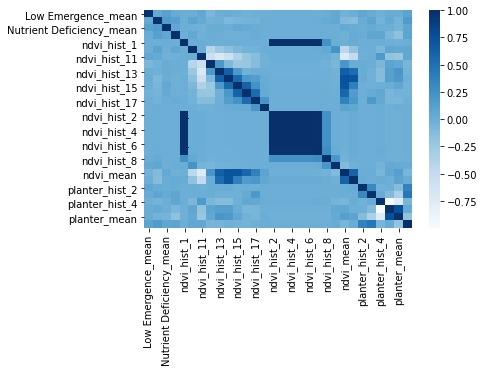

In [29]:
seaborn.heatmap(X_train.corr(),cmap='Blues',annot=False)

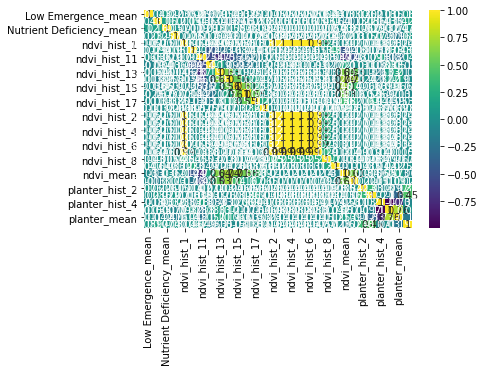

In [30]:
seaborn.heatmap(X_train.corr(),cmap='viridis',annot=True)

In [31]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
Low Emergence_mean,1.000000,0.042554,0.117751,0.022979,-0.005171,-0.002873,0.063457,-0.079162,0.000541,0.012798,-0.003789,-0.024879,-0.010885,-0.010730,-0.005171,-0.005175,-0.005169,-0.005181,-0.005148,-0.006195,0.004270,0.046539,-0.033005,0.001334,0.075920,0.019959,-0.017792,0.015068,0.010956,0.088841
New yield risk_mean,0.042554,1.000000,0.159665,0.116268,0.001497,0.094035,0.036131,-0.033651,-0.016435,-0.088662,-0.066277,-0.051954,-0.032875,0.003185,0.001497,0.001500,0.001503,0.001614,0.001519,0.004580,0.030972,0.064467,-0.102162,-0.126578,0.022373,0.085901,-0.042771,0.035364,-0.042176,0.166460
Nutrient Deficiency_mean,0.117751,0.159665,1.000000,0.057088,-0.001106,-0.009025,-0.029232,0.012643,0.011279,0.005775,0.053376,0.029864,0.003820,-0.002622,-0.001106,-0.001108,-0.001111,-0.001113,-0.001227,-0.000705,-0.005425,-0.008317,0.035785,0.017097,0.006055,0.029363,-0.003168,0.000714,-0.047390,0.074499
Replant Risk_mean,0.022979,0.116268,0.057088,1.000000,-0.002588,0.050170,-0.017361,0.006600,-0.004584,-0.020766,-0.016623,-0.007776,0.024673,-0.000882,-0.002588,-0.002568,-0.002586,-0.002595,-0.002653,-0.003346,-0.004586,0.007222,-0.020709,0.030128,0.015209,0.076933,0.072703,-0.078719,-0.162089,0.080724
ndvi_hist_1,-0.005171,0.001497,-0.001106,-0.002588,1.000000,0.006376,0.009406,-0.009948,-0.006303,-0.005626,-0.003462,-0.001771,-0.001283,-0.000202,1.000000,1.000000,1.000000,0.999997,0.999963,0.991809,0.248318,0.002954,-0.011566,0.017480,-0.001434,-0.000807,0.008335,-0.008209,-0.014208,-0.004629
ndvi_hist_10,-0.002873,0.094035,-0.009025,0.050170,0.006376,1.000000,0.007186,-0.402887,-0.231111,-0.157035,-0.086641,-0.044174,-0.029810,-0.005126,0.006376,0.006375,0.006423,0.006393,0.006497,0.012723,0.045017,0.232049,-0.437531,-0.181464,-0.000197,-0.003771,-0.078420,0.078335,0.048400,0.067108
ndvi_hist_11,0.063457,0.036131,-0.029232,-0.017361,0.009406,0.007186,1.000000,-0.539141,-0.696076,-0.564932,-0.362145,-0.203416,-0.131225,-0.024750,0.009406,0.009408,0.009393,0.009409,0.009389,0.008774,0.005285,-0.049379,-0.718670,-0.481705,-0.017435,0.009322,0.179408,-0.179026,-0.213063,0.049369
ndvi_hist_12,-0.079162,-0.033651,0.012643,0.006600,-0.009948,-0.402887,-0.539141,1.000000,0.190125,-0.098596,-0.226564,-0.211333,-0.127178,-0.029003,-0.009948,-0.009945,-0.009956,-0.009954,-0.009894,-0.012440,-0.026632,-0.072366,0.210340,0.012941,0.010686,0.002957,-0.083445,0.082647,0.051114,-0.052760
ndvi_hist_13,0.000541,-0.016435,0.011279,-0.004584,-0.006303,-0.231111,-0.696076,0.190125,1.000000,0.630162,0.188511,-0.024731,-0.001807,-0.001003,-0.006303,-0.006305,-0.006301,-0.006299,-0.006319,-0.007302,-0.013030,-0.030476,0.636185,0.532869,0.012776,-0.025619,-0.129038,0.130277,0.208335,-0.049580
ndvi_hist_14,0.012798,-0.088662,0.005775,-0.020766,-0.005626,-0.157035,-0.564932,-0.098596,0.630162,1.000000,0.559015,0.195604,0.142367,0.020781,-0.005626,-0.005629,-0.005632,-0.005638,-0.005768,-0.006605,-0.011181,-0.026062,0.735638,0.715125,0.024317,-0.028121,-0.120650,0.121974,0.186032,-0.015005


In [32]:
X_train = X_train.drop(['ndvi_hist_3', 'ndvi_hist_4', 'ndvi_hist_5', 'ndvi_hist_6', 'ndvi_hist_7'], axis=1)
X_val = X_val.drop(['ndvi_hist_3', 'ndvi_hist_4', 'ndvi_hist_5', 'ndvi_hist_6', 'ndvi_hist_7'], axis=1)

In [33]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
Low Emergence_mean,1.000000,0.042554,0.117751,0.022979,-0.005171,-0.002873,0.063457,-0.079162,0.000541,0.012798,-0.003789,-0.024879,-0.010885,-0.010730,-0.005171,0.004270,0.046539,-0.033005,0.001334,0.075920,0.019959,-0.017792,0.015068,0.010956,0.088841
New yield risk_mean,0.042554,1.000000,0.159665,0.116268,0.001497,0.094035,0.036131,-0.033651,-0.016435,-0.088662,-0.066277,-0.051954,-0.032875,0.003185,0.001497,0.030972,0.064467,-0.102162,-0.126578,0.022373,0.085901,-0.042771,0.035364,-0.042176,0.166460
Nutrient Deficiency_mean,0.117751,0.159665,1.000000,0.057088,-0.001106,-0.009025,-0.029232,0.012643,0.011279,0.005775,0.053376,0.029864,0.003820,-0.002622,-0.001106,-0.005425,-0.008317,0.035785,0.017097,0.006055,0.029363,-0.003168,0.000714,-0.047390,0.074499
Replant Risk_mean,0.022979,0.116268,0.057088,1.000000,-0.002588,0.050170,-0.017361,0.006600,-0.004584,-0.020766,-0.016623,-0.007776,0.024673,-0.000882,-0.002588,-0.004586,0.007222,-0.020709,0.030128,0.015209,0.076933,0.072703,-0.078719,-0.162089,0.080724
ndvi_hist_1,-0.005171,0.001497,-0.001106,-0.002588,1.000000,0.006376,0.009406,-0.009948,-0.006303,-0.005626,-0.003462,-0.001771,-0.001283,-0.000202,1.000000,0.248318,0.002954,-0.011566,0.017480,-0.001434,-0.000807,0.008335,-0.008209,-0.014208,-0.004629
ndvi_hist_10,-0.002873,0.094035,-0.009025,0.050170,0.006376,1.000000,0.007186,-0.402887,-0.231111,-0.157035,-0.086641,-0.044174,-0.029810,-0.005126,0.006376,0.045017,0.232049,-0.437531,-0.181464,-0.000197,-0.003771,-0.078420,0.078335,0.048400,0.067108
ndvi_hist_11,0.063457,0.036131,-0.029232,-0.017361,0.009406,0.007186,1.000000,-0.539141,-0.696076,-0.564932,-0.362145,-0.203416,-0.131225,-0.024750,0.009406,0.005285,-0.049379,-0.718670,-0.481705,-0.017435,0.009322,0.179408,-0.179026,-0.213063,0.049369
ndvi_hist_12,-0.079162,-0.033651,0.012643,0.006600,-0.009948,-0.402887,-0.539141,1.000000,0.190125,-0.098596,-0.226564,-0.211333,-0.127178,-0.029003,-0.009948,-0.026632,-0.072366,0.210340,0.012941,0.010686,0.002957,-0.083445,0.082647,0.051114,-0.052760
ndvi_hist_13,0.000541,-0.016435,0.011279,-0.004584,-0.006303,-0.231111,-0.696076,0.190125,1.000000,0.630162,0.188511,-0.024731,-0.001807,-0.001003,-0.006303,-0.013030,-0.030476,0.636185,0.532869,0.012776,-0.025619,-0.129038,0.130277,0.208335,-0.049580
ndvi_hist_14,0.012798,-0.088662,0.005775,-0.020766,-0.005626,-0.157035,-0.564932,-0.098596,0.630162,1.000000,0.559015,0.195604,0.142367,0.020781,-0.005626,-0.011181,-0.026062,0.735638,0.715125,0.024317,-0.028121,-0.120650,0.121974,0.186032,-0.015005


In [34]:
X_train = X_train.drop(['ndvi_hist_2'], axis=1)
X_val = X_val.drop(['ndvi_hist_2'], axis=1)

In [35]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
Low Emergence_mean,1.000000,0.042554,0.117751,0.022979,-0.005171,-0.002873,0.063457,-0.079162,0.000541,0.012798,-0.003789,-0.024879,-0.010885,-0.010730,0.004270,0.046539,-0.033005,0.001334,0.075920,0.019959,-0.017792,0.015068,0.010956,0.088841
New yield risk_mean,0.042554,1.000000,0.159665,0.116268,0.001497,0.094035,0.036131,-0.033651,-0.016435,-0.088662,-0.066277,-0.051954,-0.032875,0.003185,0.030972,0.064467,-0.102162,-0.126578,0.022373,0.085901,-0.042771,0.035364,-0.042176,0.166460
Nutrient Deficiency_mean,0.117751,0.159665,1.000000,0.057088,-0.001106,-0.009025,-0.029232,0.012643,0.011279,0.005775,0.053376,0.029864,0.003820,-0.002622,-0.005425,-0.008317,0.035785,0.017097,0.006055,0.029363,-0.003168,0.000714,-0.047390,0.074499
Replant Risk_mean,0.022979,0.116268,0.057088,1.000000,-0.002588,0.050170,-0.017361,0.006600,-0.004584,-0.020766,-0.016623,-0.007776,0.024673,-0.000882,-0.004586,0.007222,-0.020709,0.030128,0.015209,0.076933,0.072703,-0.078719,-0.162089,0.080724
ndvi_hist_1,-0.005171,0.001497,-0.001106,-0.002588,1.000000,0.006376,0.009406,-0.009948,-0.006303,-0.005626,-0.003462,-0.001771,-0.001283,-0.000202,0.248318,0.002954,-0.011566,0.017480,-0.001434,-0.000807,0.008335,-0.008209,-0.014208,-0.004629
ndvi_hist_10,-0.002873,0.094035,-0.009025,0.050170,0.006376,1.000000,0.007186,-0.402887,-0.231111,-0.157035,-0.086641,-0.044174,-0.029810,-0.005126,0.045017,0.232049,-0.437531,-0.181464,-0.000197,-0.003771,-0.078420,0.078335,0.048400,0.067108
ndvi_hist_11,0.063457,0.036131,-0.029232,-0.017361,0.009406,0.007186,1.000000,-0.539141,-0.696076,-0.564932,-0.362145,-0.203416,-0.131225,-0.024750,0.005285,-0.049379,-0.718670,-0.481705,-0.017435,0.009322,0.179408,-0.179026,-0.213063,0.049369
ndvi_hist_12,-0.079162,-0.033651,0.012643,0.006600,-0.009948,-0.402887,-0.539141,1.000000,0.190125,-0.098596,-0.226564,-0.211333,-0.127178,-0.029003,-0.026632,-0.072366,0.210340,0.012941,0.010686,0.002957,-0.083445,0.082647,0.051114,-0.052760
ndvi_hist_13,0.000541,-0.016435,0.011279,-0.004584,-0.006303,-0.231111,-0.696076,0.190125,1.000000,0.630162,0.188511,-0.024731,-0.001807,-0.001003,-0.013030,-0.030476,0.636185,0.532869,0.012776,-0.025619,-0.129038,0.130277,0.208335,-0.049580
ndvi_hist_14,0.012798,-0.088662,0.005775,-0.020766,-0.005626,-0.157035,-0.564932,-0.098596,0.630162,1.000000,0.559015,0.195604,0.142367,0.020781,-0.011181,-0.026062,0.735638,0.715125,0.024317,-0.028121,-0.120650,0.121974,0.186032,-0.015005


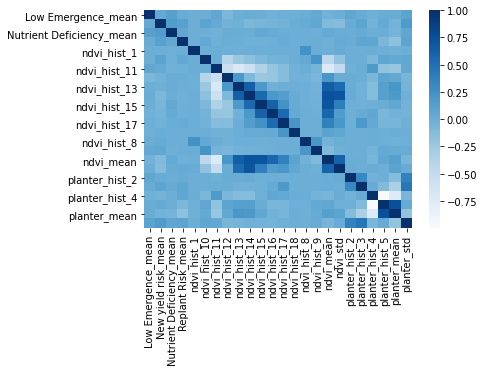

In [36]:
seaborn.heatmap(X_train.corr(),cmap='Blues',annot=False)

In [43]:
train.corr()['harvest_mean']

Low Emergence_mean         -0.145118
New yield risk_mean        -0.194361
Nutrient Deficiency_mean   -0.318430
Replant Risk_mean          -0.197401
harvest_mean                1.000000
ndvi_hist_0                      NaN
ndvi_hist_1                -0.004346
ndvi_hist_10               -0.010764
ndvi_hist_11               -0.082366
ndvi_hist_12                0.082899
ndvi_hist_13                0.108361
ndvi_hist_14                0.050703
ndvi_hist_15               -0.076025
ndvi_hist_16               -0.094606
ndvi_hist_17               -0.087500
ndvi_hist_18               -0.060506
ndvi_hist_2                -0.004346
ndvi_hist_3                -0.004352
ndvi_hist_4                -0.004348
ndvi_hist_5                -0.004303
ndvi_hist_6                -0.004006
ndvi_hist_7                -0.005257
ndvi_hist_8                -0.001755
ndvi_hist_9                -0.003862
ndvi_mean                   0.007802
ndvi_std                    0.027003
planter_hist_0                   NaN
p

In [44]:
train_feature = train[['harvest_mean', 'Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean', 'Replant Risk_mean', 'ndvi_mean', 'ndvi_std', 'planter_mean', 'planter_std']]

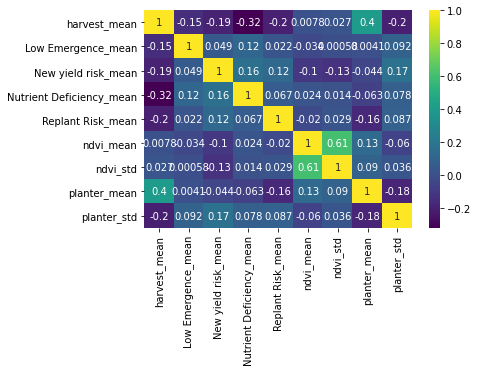

In [45]:
seaborn.heatmap(train_feature.corr(),cmap='viridis',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


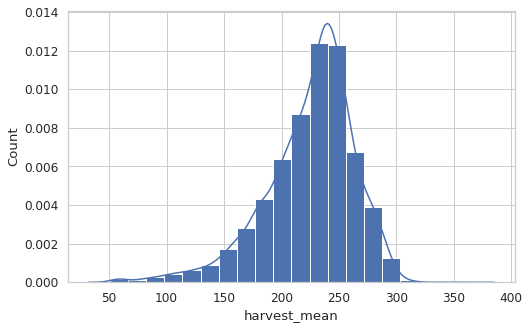

In [47]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train_feature['harvest_mean'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='harvest_mean', ylabel='Count');

In [48]:
train_feature.describe()

,harvest_mean,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_mean,ndvi_std,planter_mean,planter_std
count,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000
mean,224.726271,0.203087,0.220602,0.133807,0.033178,0.300569,0.065114,35162.378046,1013.139056
std,39.268998,0.329492,0.344606,0.318225,0.138439,0.080574,0.029713,1733.244451,801.334766
min,50.441578,0.000000,0.000000,0.000000,0.000000,0.067838,0.010473,25389.802734,0.000000
25%,204.053043,0.000000,0.000316,0.000000,0.000000,0.251965,0.042334,34123.598633,413.369881
50%,231.903946,0.032982,0.061903,0.000000,0.000000,0.290847,0.058916,35504.556641,775.940338
75%,250.606483,0.292389,0.292154,0.085702,0.000000,0.337043,0.083900,36290.360352,1449.397980
max,366.780670,3.356656,2.798137,3.317399,2.489798,0.786439,0.221210,39308.273438,7586.876465


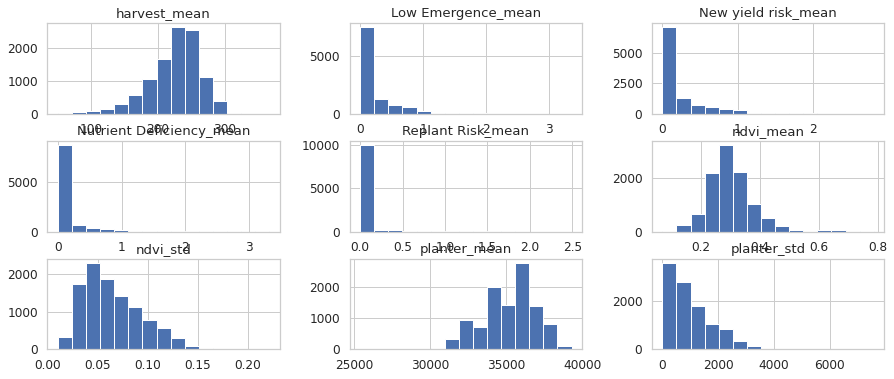

In [49]:
train_feature[list(train_feature.columns)].hist(bins=15, figsize=(15, 6), layout=(3, 3));

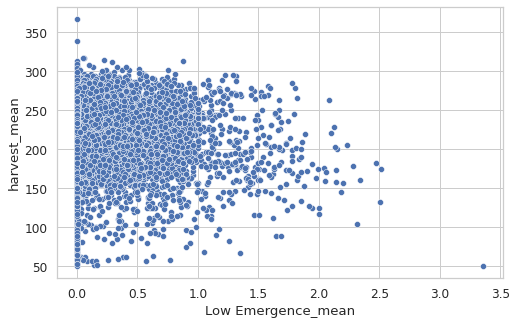

In [50]:
sns.scatterplot(y=train_feature['harvest_mean'], x=train_feature['Low Emergence_mean'])

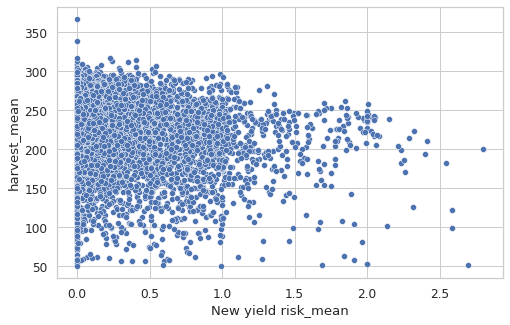

In [52]:
sns.scatterplot(x=train_feature["New yield risk_mean"], y=train_feature['harvest_mean'])

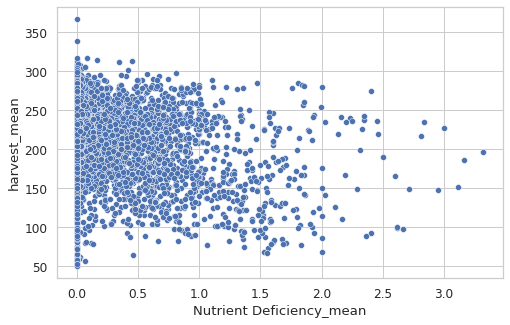

In [53]:
sns.scatterplot(x=train_feature["Nutrient Deficiency_mean"], y=train_feature['harvest_mean'])

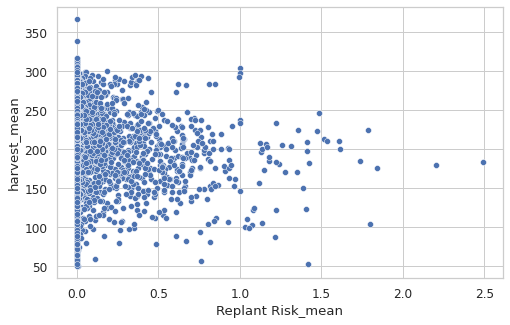

In [54]:
sns.scatterplot(x=train_feature["Replant Risk_mean"], y=train_feature['harvest_mean'])

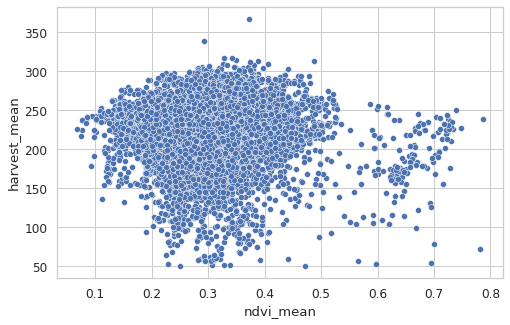

In [55]:
sns.scatterplot(x=train_feature["ndvi_mean"], y=train_feature['harvest_mean'])

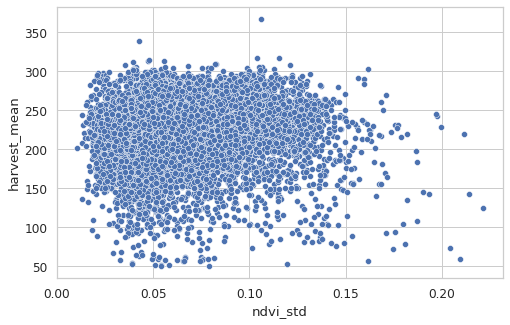

In [56]:
sns.scatterplot(x=train_feature["ndvi_std"], y=train_feature['harvest_mean'])

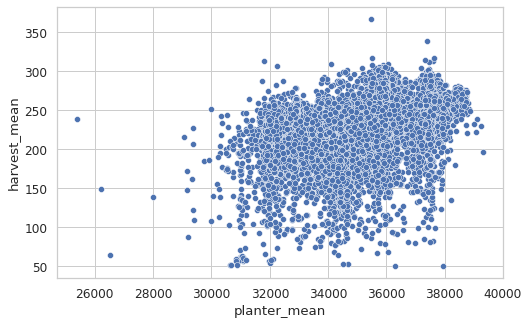

In [57]:
sns.scatterplot(x=train_feature["planter_mean"], y=train_feature['harvest_mean'])

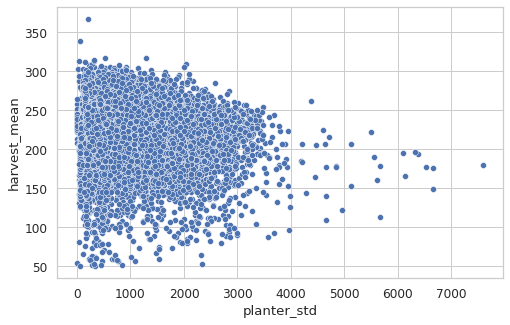

In [58]:
sns.scatterplot(x=train_feature["planter_std"], y=train_feature['harvest_mean'])

In [65]:
Q1 = train_feature.quantile(0.25)
Q3 = train_feature.quantile(0.75)
IQR = Q3 - Q1

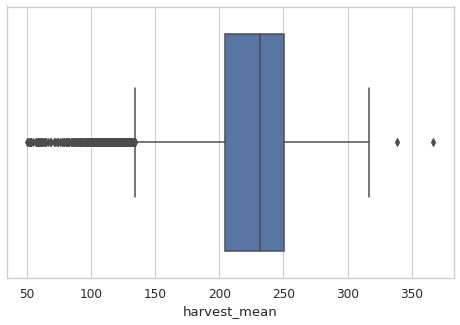

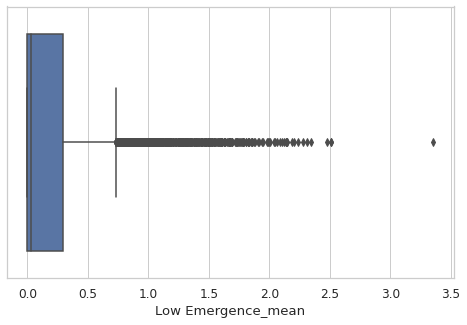

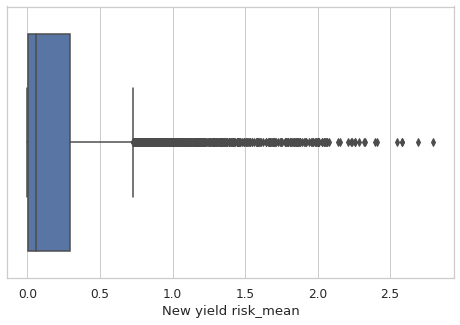

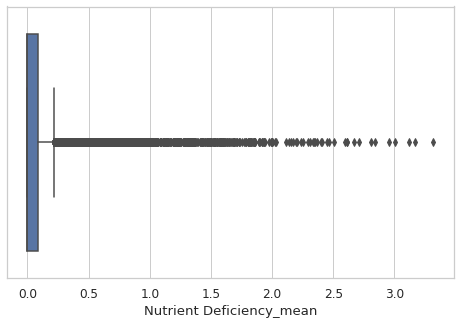

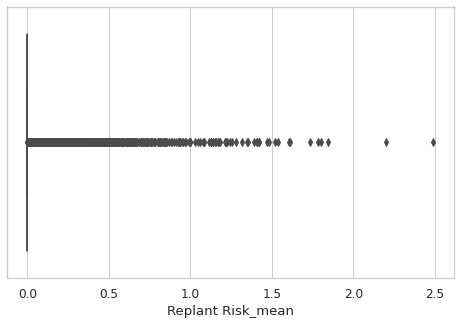

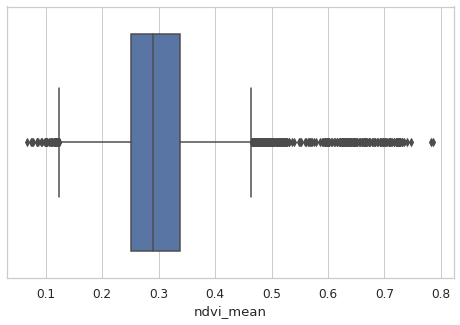

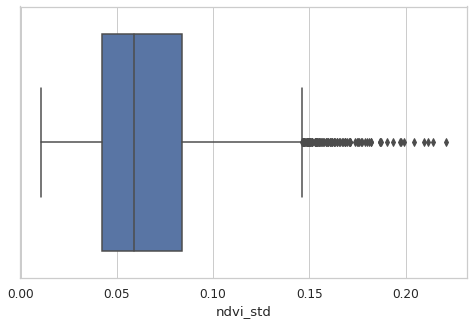

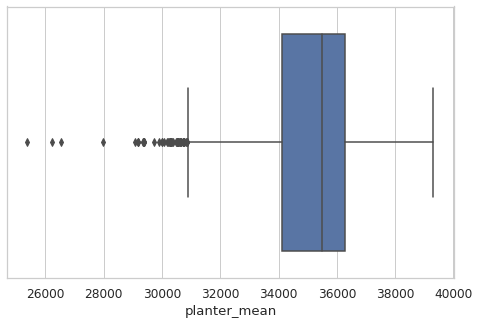

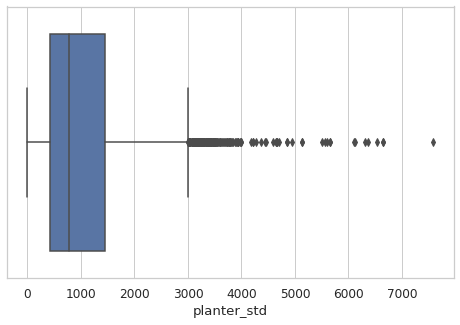

In [94]:
for i in list(train_feature.columns):
  plt.figure()
  sns.boxplot(x=train_feature[i])
  plt.show()

In [96]:
for i in list(train_feature.columns):
  out_count = 0
  for j in list(train_feature[i]):
    if ((j < (Q1[i] - 1.5 * IQR[i])) or (j > (Q3[i] + 1.5 * IQR[i]))):
      out_count += 1
  print(f"The number of outliers for column {i} is {out_count}")

The number of outliers for column harvest_mean is 317
The number of outliers for column Low Emergence_mean is 850
The number of outliers for column New yield risk_mean is 1009
The number of outliers for column Nutrient Deficiency_mean is 1807
The number of outliers for column Replant Risk_mean is 1935
The number of outliers for column ndvi_mean is 377
The number of outliers for column ndvi_std is 99
The number of outliers for column planter_mean is 54
The number of outliers for column planter_std is 199


In [99]:
test_feature = test[['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean', 'Replant Risk_mean', 'ndvi_mean', 'ndvi_std', 'planter_mean', 'planter_std']]

In [100]:
for i in list(test_feature.columns):
  out_count = 0
  for j in list(test_feature[i]):
    if ((j < (Q1[i] - 1.5 * IQR[i])) or (j > (Q3[i] + 1.5 * IQR[i]))):
      out_count += 1
  print(f"The number of outliers for column {i} is {out_count}")

The number of outliers for column Low Emergence_mean is 363
The number of outliers for column New yield risk_mean is 360
The number of outliers for column Nutrient Deficiency_mean is 630
The number of outliers for column Replant Risk_mean is 948
The number of outliers for column ndvi_mean is 384
The number of outliers for column ndvi_std is 37
The number of outliers for column planter_mean is 41
The number of outliers for column planter_std is 36


In [101]:
test.shape

(3513, 41)